In [79]:
import re
import string

import numpy as np
import pandas as pd
from pathlib import Path
from unidecode import unidecode
import matplotlib.pyplot as plt



from sklearn.metrics import silhouette_samples, silhouette_score
import umap
import umap.plot
from sklearn.cluster import KMeans
#from ml_editor.data_visualization import plot_embeddings


import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [6]:
df = pd.read_csv(Path('/mnt/c/Users/camil/Documents/IFG/IA/DadosPortarias'))

In [7]:
df.drop('dataEfetiva',axis=1,inplace=True)
df.drop('interessado',axis=1,inplace=True)
df.drop('matricula',axis=1,inplace=True)

In [8]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        5410 non-null   int64 
 1   textoConsolidado  5410 non-null   object
 2   assunt            5397 non-null   object
dtypes: int64(1), object(2)
memory usage: 126.9+ KB


,Unnamed: 0,textoConsolidado,assunt
0,0,MINISTÉRIO DA EDUCAÇÃO Secretaria de Educação ...,GENÉRICA FISCAL DE CONTRATO
1,1,MINISTÉRIO DA EDUCAÇÃO Secretaria de Educação ...,GENÉRICA FISCAL DE CONTRATO
2,2,MINISTÉRIO DA EDUCAÇÃO Secretaria de Educação ...,GENÉRICA FISCAL DE CONTRATO
3,3,MINISTÉRIO DA EDUCAÇÃO Secretaria de Educação ...,GENÉRICA FISCAL DE CONTRATO
4,4,MINISTÉRIO DA EDUCAÇÃO Secretaria de Educação ...,GENÉRICA FISCAL DE CONTRATO


In [9]:
df["texto"] = df["textoConsolidado"] + df["assunt"]
df.drop('textoConsolidado', axis=1, inplace=True)
df.drop('assunt', axis=1, inplace=True)

In [10]:
df[df["texto"].isna()]

,Unnamed: 0,texto
951,951,NaN
952,952,NaN
953,953,NaN
1583,1583,NaN
1584,1584,NaN
1585,1585,NaN
1586,1586,NaN
1587,1587,NaN
1588,1588,NaN
1589,1589,NaN


In [11]:
df.dropna(subset=['texto'],inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5397 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5397 non-null   int64 
 1   texto       5397 non-null   object
dtypes: int64(1), object(1)
memory usage: 126.5+ KB


In [13]:
df["texto"] = df['texto'].str.lower()

In [14]:
# Remoção de pontuação e símbolos

# Tabela de pontuação
punctuation = string.punctuation
# Criar tabela de tradução que susbstituirá toda ponutação por um espaço em branco
trantab = str.maketrans(punctuation, len(punctuation)*' ')
# Traduzir nosso exemplo
df["texto"] = df['texto'].str.translate(trantab)

df.head()

,Unnamed: 0,texto
0,0,ministério da educação secretaria de educação ...
1,1,ministério da educação secretaria de educação ...
2,2,ministério da educação secretaria de educação ...
3,3,ministério da educação secretaria de educação ...
4,4,ministério da educação secretaria de educação ...


In [15]:
df['texto']=[unidecode(x) for x in df['texto']]

In [16]:
df['texto'][0] #Visualizar primeiras modificações

'ministerio da educacao secretaria de educacao profissional e tecnologica instituto federal de educacao  ciencia e tecnologia de goias reitoria portaria no 2244   reitoria ifg  de 30 de agosto de 2022 a reitora do instituto federal de educacao  ciencia e tecnologia de goias  ifg    nomeada por decreto presidencial de 5 de outubro de 2021  publicado no diario oficial da uniao de 6 10 2021  no uso de suas atribuicoes legais e regimentais  considerando o que consta no processo no 23372 002069 2022 69   resolve  art  1o designar como fiscais os servidores  conforme se segue  de acordo com o previsto no art  67 da lei no 8 666  de 21 de junho de 1993  e legislacao correlata  na instrucao normativa seges mpdg no 5  de 25 de maio de 2017  para gerenciarem  acompanharem e fiscalizarem a execucao e o adequado cumprimento das clausulas estabelecidas no contrato no 16 2022  celebrado entre o a  reitoria e a empresa msm engenharia ltda   cnpj  37 320 553 0001 31  cujo objeto e a realizacao de obra

In [17]:
# Remover dígitos

def remove_digits(input_text):
    import re
    return re.sub('\d+', '', input_text)

df['texto']=[remove_digits(x) for x in df['texto']]
df['texto'][0]

'ministerio da educacao secretaria de educacao profissional e tecnologica instituto federal de educacao  ciencia e tecnologia de goias reitoria portaria no    reitoria ifg  de  de agosto de  a reitora do instituto federal de educacao  ciencia e tecnologia de goias  ifg    nomeada por decreto presidencial de  de outubro de   publicado no diario oficial da uniao de     no uso de suas atribuicoes legais e regimentais  considerando o que consta no processo no       resolve  art  o designar como fiscais os servidores  conforme se segue  de acordo com o previsto no art   da lei no    de  de junho de   e legislacao correlata  na instrucao normativa seges mpdg no   de  de maio de   para gerenciarem  acompanharem e fiscalizarem a execucao e o adequado cumprimento das clausulas estabelecidas no contrato no    celebrado entre o a  reitoria e a empresa msm engenharia ltda   cnpj        cujo objeto e a realizacao de obras de execucao dos projetos de prevencao e combate a incendio e panico   ppcip d

In [18]:
# Remover stopwords

try:
    stopwords_list = stopwords.words('portuguese')
except:
    nltk.download('stopwords')
    stopwords_list = stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /home/camila/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
newStopWords=['diario','publicado','presidencial','decreto','reitora','educacaosecretaria','ministerio','educacao','secretaria', 'profissional','tecnologica', 'tecnologicainstituto', 'federal', 'ciencia', 'tecnologia', 'goiasreitoriaportaria', 'goias', 'reitoria', 'portaria', 'ifg', 'instituto', 'oficial', 'uniao', 'atribuicoes', 'legais', 'regimentais'] 
stopwords_list.extend(newStopWords)

In [20]:
def remove_stopwords(input_text, stopwords_list):
    words = input_text.split()
    clean_words = [word for word in words if (word not in stopwords_list) and len(word) > 1]
    return " ".join(clean_words)

df['texto'] = [remove_stopwords(x, stopwords_list) for x in df['texto']] 
df['texto'][0]

'agosto nomeada outubro uso considerando consta processo resolve art designar fiscais servidores conforme segue acordo previsto art lei junho legislacao correlata instrucao normativa seges mpdg maio gerenciarem acompanharem fiscalizarem execucao adequado cumprimento clausulas estabelecidas contrato celebrado empresa msm engenharia ltda cnpj cujo objeto realizacao obras execucao projetos prevencao combate incendio panico ppcip campus aparecida goiania formosa jatai luziania valparaiso conforme detalhamento seguir item referente campus aparecida goiania titular funcao matricula siape raissa regis silva gestor erique souza zanon fiscal tecnico titular cesar oliveira guimaraes fiscal tecnico substituto rodrigo souza arantes fiscal administrativo item referente campus formosa titular funcao matricula siape ricardo noronha tristao gestor erique souza zanon fiscal tecnico titular cesar oliveira guimaraes fiscal tecnico substituto milton pereira neves filho fiscal administrativo item referente

In [21]:
# O TF-IDF

# Instanciar o vetorizador do sklearn
tfv = TfidfVectorizer(binary=True) #Fazer em binário
# Ajustar os pesos e fazer a transformação do corpus para a representação TF-IDF
tfidf = tfv.fit_transform(df['texto'])


tfidf = pd.DataFrame.sparse.from_spmatrix(tfidf, columns=tfv.get_feature_names())
tfidf.shape

/home/camila/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(5397, 3974)

In [23]:
#Defindo o rótulo de cada portaria
categoria = pd.read_csv(Path('/mnt/c/Users/camil/Documents/IFG/IA/Categorias2.csv'))

In [24]:
categoria.head()

,categoria,texto
0,A,Conselho de Ensino Pesquisa e Extensão 1 Gen...
1,A,Conselho Superior 1 Genérica Atualização CONSUP
2,A,Conselho de Câmpus 1 Genérica Conselho de Câm...
3,A,Conselho de Câmpus 2 Genérica Atualização Con...
4,A,Conselho de Câmpus 3 Genérica Secretaria do C...


In [25]:
#Alguns pré-processamentos para as categorias
categoria["texto"] = categoria['texto'].str.lower()
# Remoção de pontuação e símbolos
# Traduzir nosso exemplo
categoria["texto"] = categoria['texto'].str.translate(trantab)

categoria['texto']=[unidecode(x) for x in categoria['texto']]
categoria['texto']=[remove_digits(x) for x in categoria['texto']]

categoria['texto'] = [remove_stopwords(x, stopwords_list) for x in categoria['texto']] 

In [26]:
set1=tfv.get_feature_names()

/home/camila/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
tfv.get_feature_names()

['abadia',
 'abadio',
 'abastecimento',
 'abc',
 'abdala',
 'abdalla',
 'abec',
 'aberta',
 'abilio',
 'abimael',
 'abishai',
 'abnner',
 'abono',
 'abrantes',
 'abrao',
 'abreu',
 'abril',
 'academica',
 'academicas',
 'academico',
 'academicos',
 'acao',
 'aceleracao',
 'acessibilidade',
 'acesso',
 'acessorios',
 'aciole',
 'acoes',
 'acompanhamento',
 'acompanhando',
 'acompanhar',
 'acompanharem',
 'acordo',
 'acordos',
 'adad',
 'adalberto',
 'adao',
 'adapatacoes',
 'adaptacao',
 'adaptacoes',
 'adauto',
 'adel',
 'ademar',
 'adequacao',
 'adequacoes',
 'adequado',
 'aderito',
 'adicionais',
 'adicional',
 'adilson',
 'adjudicadas',
 'adjunta',
 'adjunto',
 'adm',
 'administraao',
 'administracao',
 'administrador',
 'administradora',
 'administrar',
 'administrativa',
 'administrativas',
 'administrativo',
 'administrativos',
 'admitida',
 'admprf',
 'adolfo',
 'adorno',
 'adotante',
 'adria',
 'adriam',
 'adriana',
 'adriane',
 'adriano',
 'adrielly',
 'adultos',
 'aelton',
 '

In [28]:
len(set1)

3974

In [29]:
#Análise de intersecção
#Pegar dicionario
tfv2 = TfidfVectorizer(binary=True)
# Ajustar os pesos e fazer a transformação do corpus para a representação TF-IDF
temp2 = tfv2.fit_transform(categoria['texto'])

In [30]:
set2=tfv2.get_feature_names()
len(set2)

196

In [31]:
len(set(set2).difference(set(set1)))

20

In [32]:
len(set2)

196

In [33]:
rotulo = tfv.transform(categoria['texto']) # temos 2 tabelas com mesma quantidade de colunas
rotulo = pd.DataFrame.sparse.from_spmatrix(rotulo, columns=tfv.get_feature_names())

In [34]:
rotulo.shape #tfidf das portarias tem a mesma quantidade de colunas para a compração

(80, 3974)

In [35]:
tfidf.shape #mesma quantidade de linhas que os rotulos

(5397, 3974)

In [36]:
#rotulo['categoria'] = categoria['categoria'] #Adicionando a coluna categoria para facilitar

In [37]:
multiplicacao = cosine_similarity(tfidf,rotulo)

In [38]:
multiplicacao.shape

(5397, 80)

In [39]:
multiplicacao[1]

array([0.00713647, 0.00898382, 0.01998707, 0.01771028, 0.01998707,
       0.00711681, 0.00532853, 0.00760906, 0.00720838, 0.00472761,
       0.        , 0.00634789, 0.0101856 , 0.01116544, 0.04443406,
       0.04658574, 0.0062344 , 0.02895045, 0.02792576, 0.0058946 ,
       0.01169502, 0.00426084, 0.00682923, 0.01012835, 0.00885413,
       0.00704844, 0.        , 0.0150532 , 0.02145014, 0.        ,
       0.01172753, 0.00511402, 0.00522575, 0.00639936, 0.00383759,
       0.00466022, 0.00555539, 0.00559778, 0.00531288, 0.00400885,
       0.00570771, 0.01532544, 0.00490277, 0.0130928 , 0.00588296,
       0.00588323, 0.00505841, 0.00609385, 0.01166493, 0.00717908,
       0.00536973, 0.00570194, 0.00509255, 0.00742743, 0.0074452 ,
       0.00982501, 0.00816358, 0.02899189, 0.00888032, 0.0087364 ,
       0.01392118, 0.01497885, 0.01585865, 0.02342097, 0.00805134,
       0.01563378, 0.01430184, 0.01563378, 0.01614667, 0.02561984,
       0.01708292, 0.03226392, 0.00975373, 0.20455014, 0.21568

In [41]:
for i in range(len(multiplicacao)): # iteração para cada linha
    index = np.argmax(multiplicacao[i])
    tfidf.at[i,'rotulo'] = categoria.at[index,'categoria']

In [42]:
print(tfidf.iloc[1]['rotulo'])

G


In [43]:
print( np.argmax(multiplicacao[1]))

75


In [44]:
categoria.at[75,'categoria']

'G'

In [45]:
tfidf['rotulo']

0       G
1       G
2       G
3       G
4       G
       ..
5392    E
5393    E
5394    E
5395    E
5396    B
Name: rotulo, Length: 5397, dtype: object

In [46]:
#1Gerar TF-IDF das portarias de forma binária
#2Aplicar o transform para os dados de categorias
#3Rotular as portarias multiplicando portaria por categorias e atribuindo o rótulo com maior valor de multiplicação. 
#Importante, categorias com vetorezes zerados já recebem categoria N

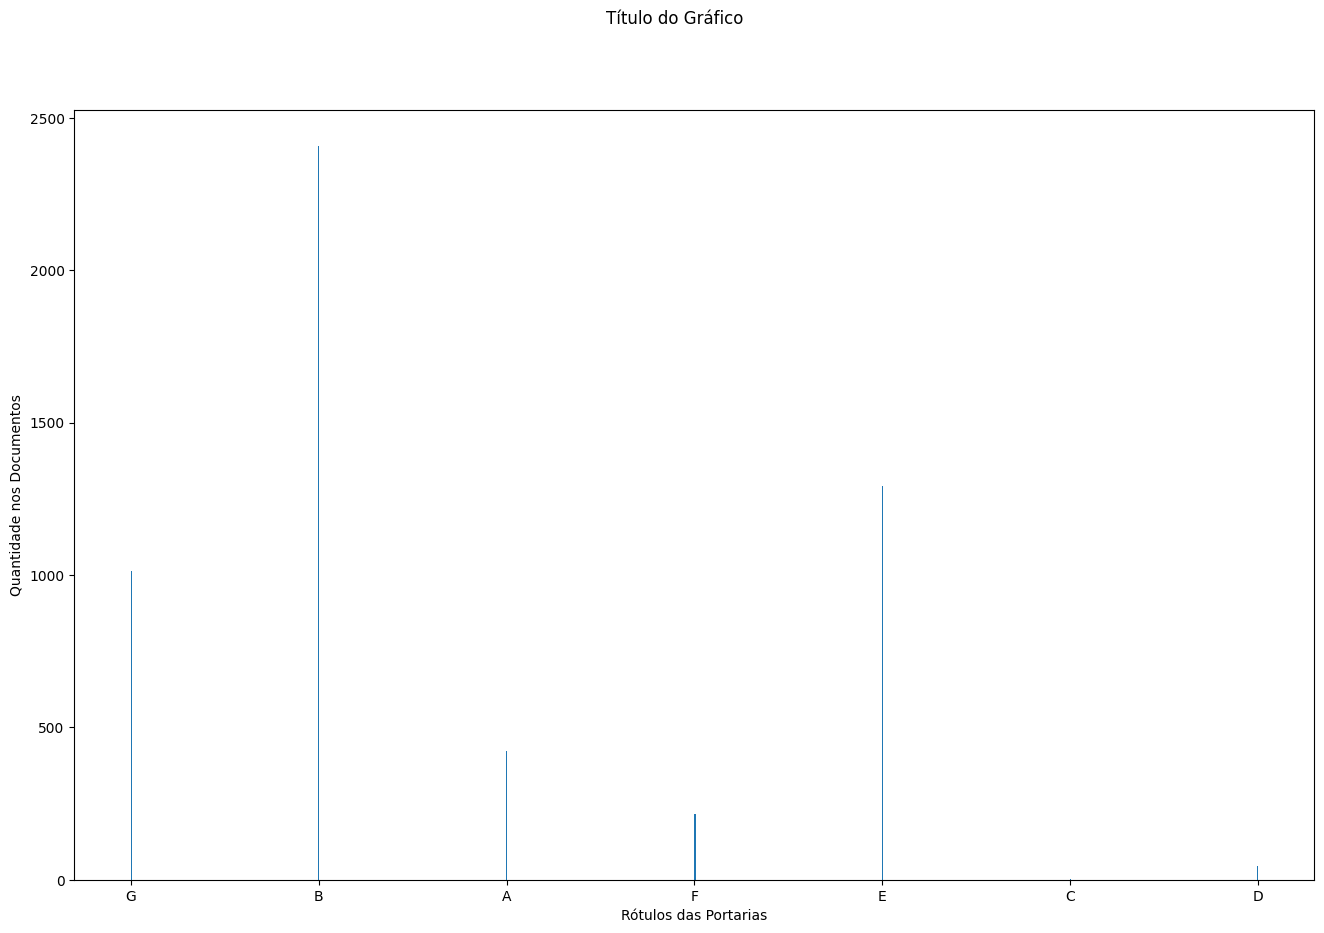

In [47]:
#Crie um histograma mostrando a variação no tamanho de cada portaria. 
#https://github.com/hundredblocks/ml-powered-applications/blob/master/notebooks/dataset_exploration.ipynb
fig = plt.figure(figsize=(16,10))
fig.suptitle("Título do Gráfico")
plt.xlabel("Rótulos das Portarias")
plt.ylabel("Quantidade nos Documentos")
q_len = plt.hist(tfidf['rotulo'],  bins=1000,log=False)

In [48]:
#Mostrar um histograma por categoria para análise de balanceamento

In [49]:
sent_labels = tfidf['rotulo']
sent_labels.value_counts()

B    2407
E    1292
G    1013
A     423
F     215
D      45
C       2
Name: rotulo, dtype: int64

In [65]:
#Motrar Gráfico UMPA: Dados por Categoria usando rótulos
#https://github.com/hundredblocks/ml-powered-applications/blob/master/notebooks/vectorizing_text.ipynb

#umap_embedder = umap.UMAP()
#umap_bow = umap_embedder.fit_transform(multiplicacao) #Tem que ser o vetor da multiplicação, por ser números.

mapper = umap.UMAP().fit(multiplicacao)


/home/camila/.local/lib/python3.8/site-packages/umap/spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/home/camila/.local/lib/python3.8/site-packages/umap/spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


In [52]:
# Rotulo com suas quantidades
sent_labels = tfidf['rotulo']
sent_labels.value_counts()

B    2407
E    1292
G    1013
A     423
F     215
D      45
C       2
Name: rotulo, dtype: int64

<AxesSubplot:>

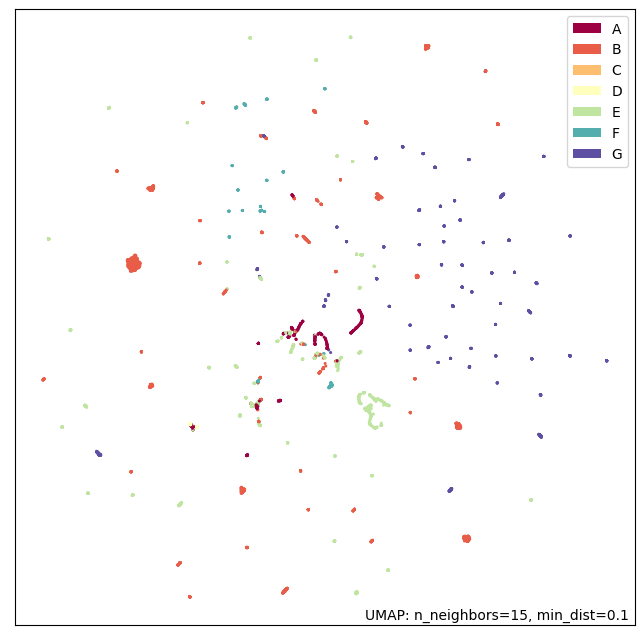

In [68]:
#
#umap.plot.points(umap_bow, sent_labels)
umap.plot.points(mapper, labels=sent_labels)

In [ ]:
#Mostrar Gráfico Clustering: Dados em clusters NClusters = #Categorias
#https://github.com/hundredblocks/ml-powered-applications/blob/master/notebooks/clustering_data.ipynb

/home/camila/.local/lib/python3.8/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


<AxesSubplot:title={'center':'Colored by approx local dimension'}>

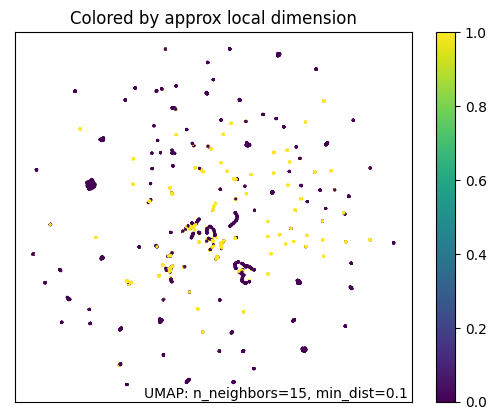

In [72]:
#Utilizando outra forma de plotagem
umap.plot.diagnostic(mapper, diagnostic_type='local_dim')

In [ ]:
#Mostrar Gráfico Clustering: Dados em clusters NClusters = #Categorias
#https://github.com/hundredblocks/ml-powered-applications/blob/master/notebooks/clustering_data.ipynb

In [74]:
#Análise gráfica utilizando clusters

umap_embedder = umap.UMAP()
umap_features = umap_embedder.fit_transform(multiplicacao)

/home/camila/.local/lib/python3.8/site-packages/umap/spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/home/camila/.local/lib/python3.8/site-packages/umap/spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


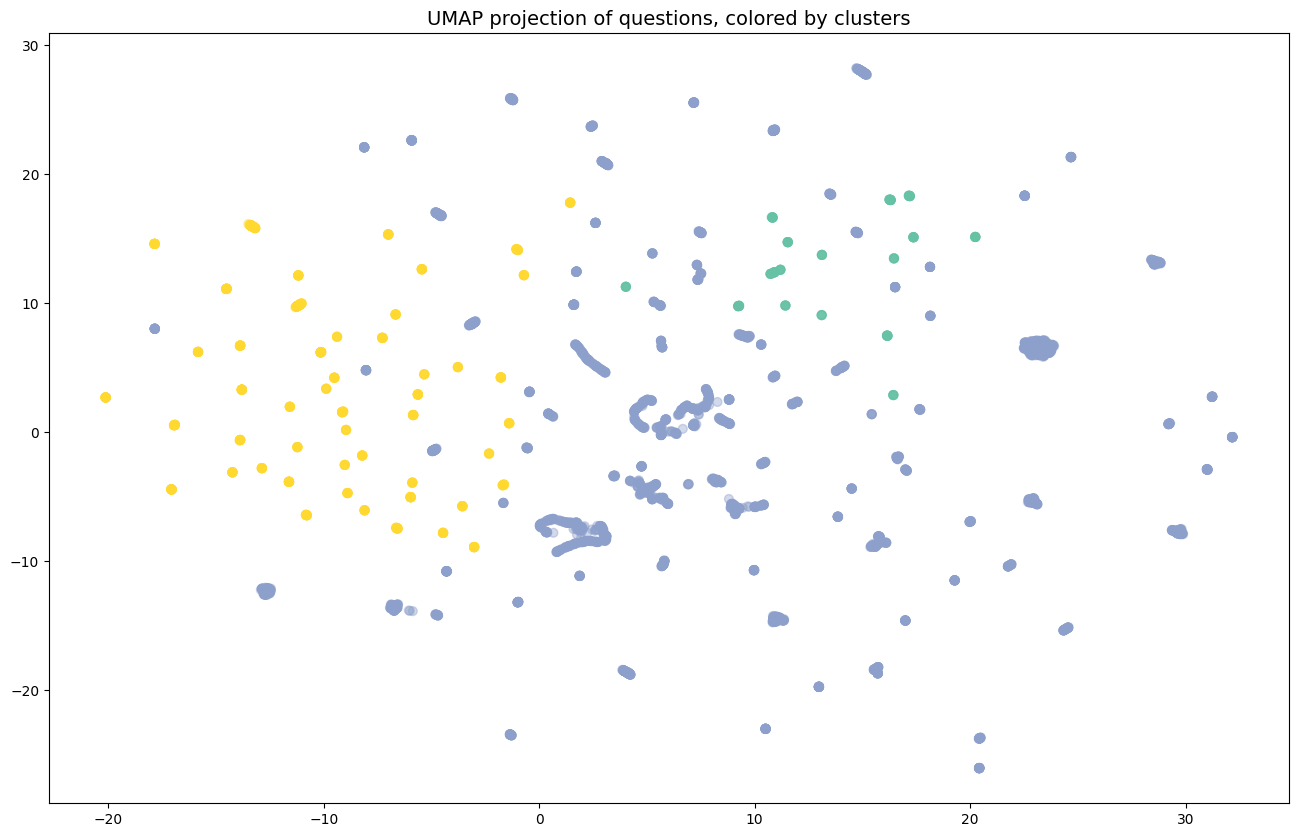

In [76]:


# Choose number of clusters and colormap
n_clusters=3
cmap = plt.get_cmap("Set2")
fig = plt.figure(figsize=(16, 10))


# Fit clustering algorithm to our vectorized features
clus = KMeans(n_clusters=n_clusters, random_state=10)
clusters = clus.fit_predict(multiplicacao)

# Plot the dimentionality reduced features on a 2D plane
plt.scatter(umap_features[:, 0], umap_features[:, 1], 
            c=[cmap(x/n_clusters) for x in clusters], s=40, alpha=.4)
plt.title('UMAP projection of questions, colored by clusters', fontsize=14);



In [ ]:
# Forma mais detalhista usado no código disponibilizado 

For n_clusters = 2 The average silhouette_score is : 0.4211748087209484
(2, 80)


/home/camila/.local/lib/python3.8/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


For n_clusters = 3 The average silhouette_score is : 0.313083509602785
(3, 80)
For n_clusters = 4 The average silhouette_score is : 0.2778199861689737
(4, 80)
For n_clusters = 5 The average silhouette_score is : 0.2581802940320841
(5, 80)
For n_clusters = 6 The average silhouette_score is : 0.25456034135948424
(6, 80)


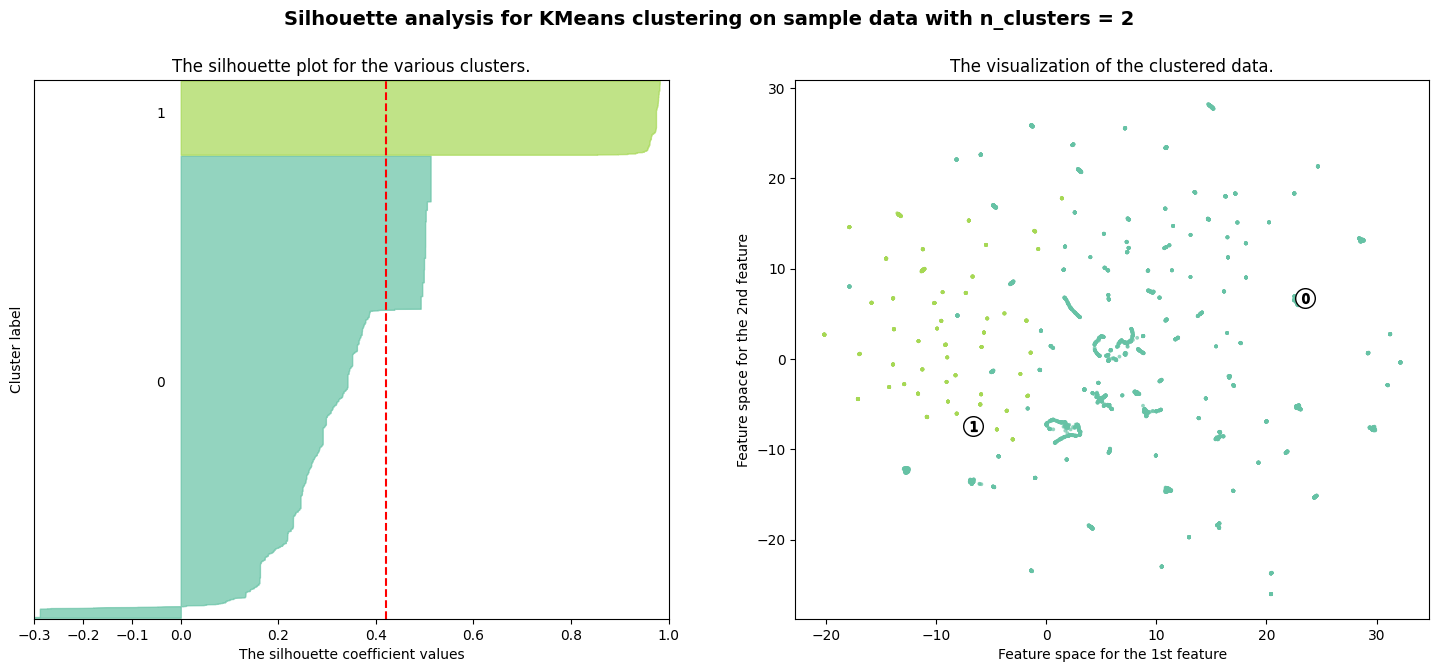

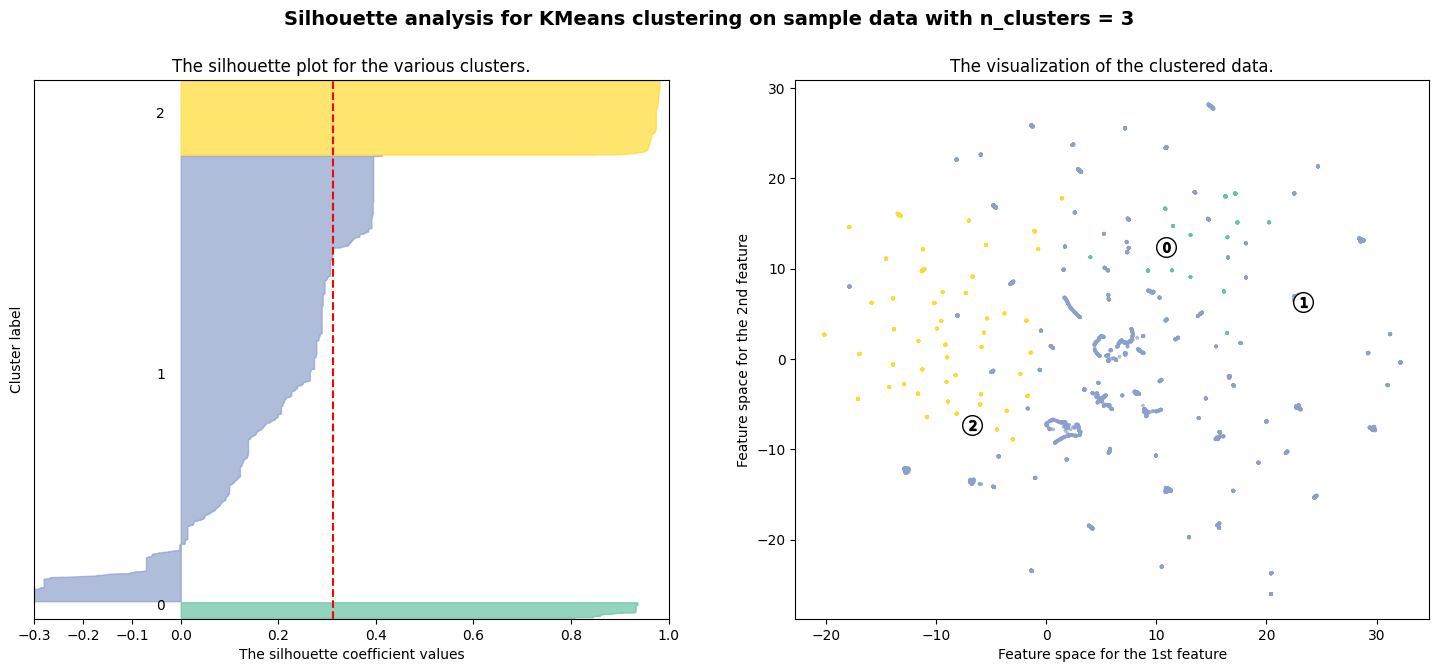

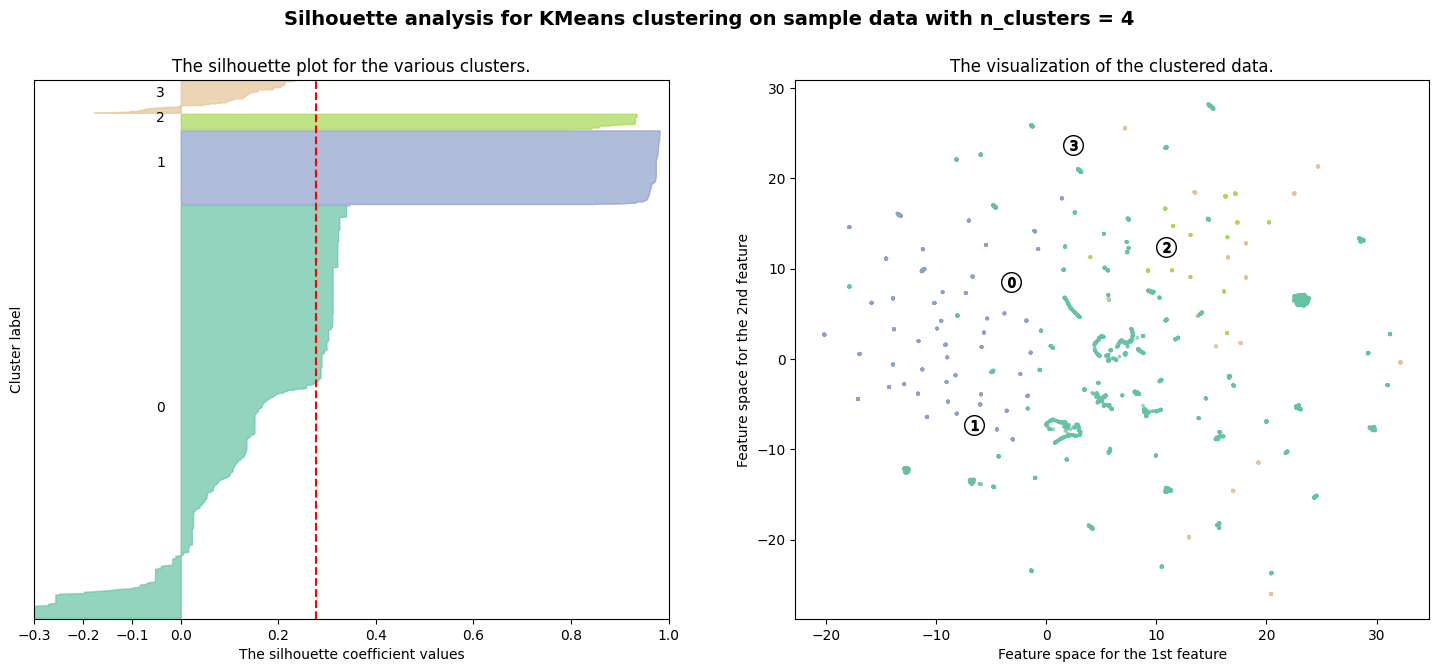

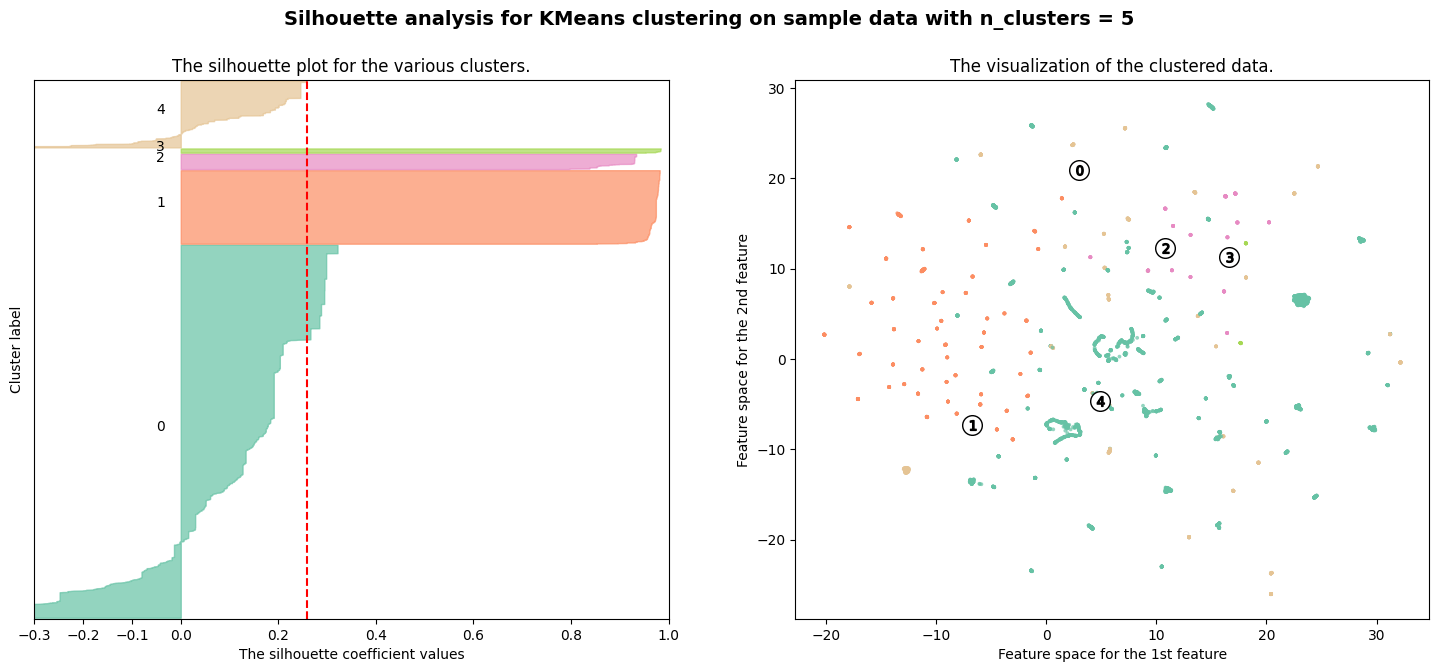

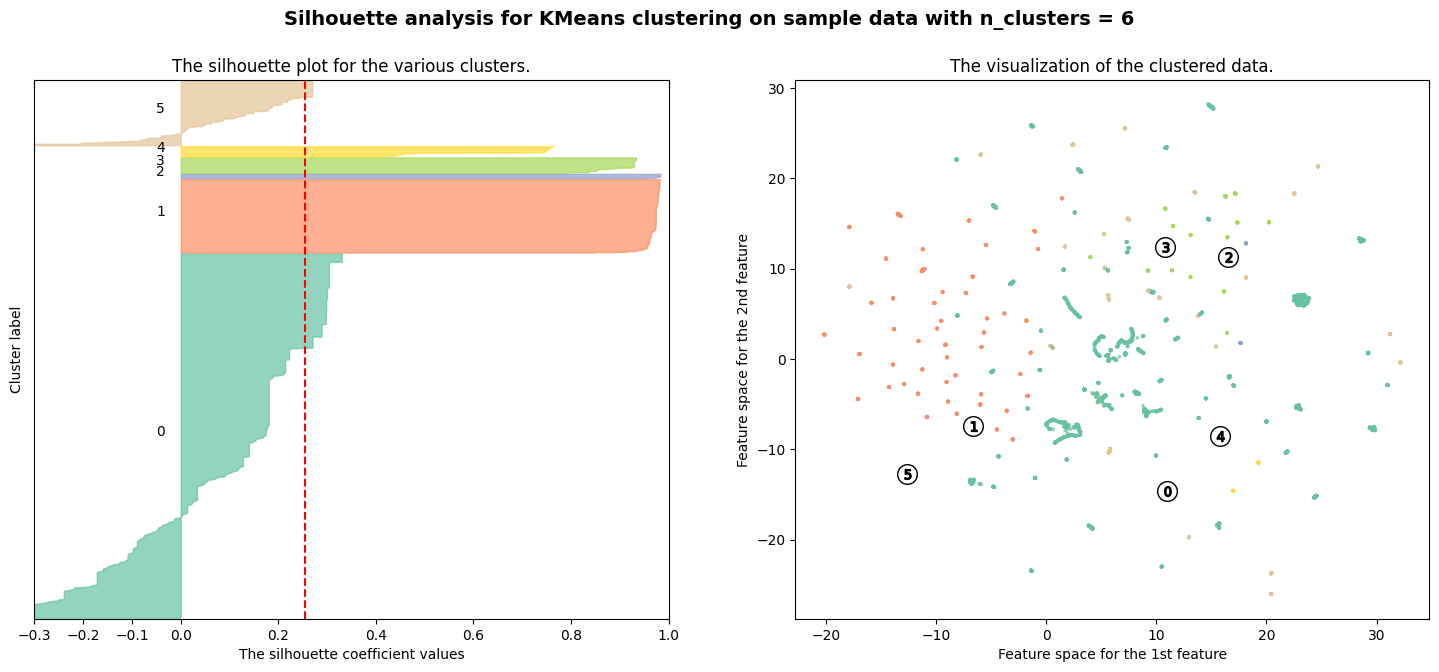

In [80]:
range_n_clusters = [2, 3, 4, 5, 6]

to_clus = multiplicacao #Alteração apenas no uso do array de multiplicacao

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-.3, .4])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(to_clus) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(to_clus)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(to_clus, cluster_labels, metric='cosine')
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(to_clus, cluster_labels, metric='cosine')

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.3, -0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cmap(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(umap_features[:, 0], umap_features[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centerss = clusterer.cluster_centers_
    print(centerss.shape)
    centers = umap_embedder.transform(centerss)
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

